# <center> Facial Keypoint Detection </center>

<img src="https://images.ctfassets.net/3viuren4us1n/5YzA7KGIWQEjt8KStZGlxd/85bde9966a9e9c4407396f424e46fc67/facial_recognition.jpg?fm=webp&w=1920">

**The objective of this task is to predict keypoint positions on face images. This can be used as a building block in several applications, such as:**

* tracking faces in images and video
* analysing facial expressions
* detecting dysmorphic facial signs for medical diagnosis
* biometrics / face recognition

# Importing Required Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import (
    Flatten,
    Dense,
    Dropout,
    Conv2D,
    LeakyReLU,
    BatchNormalization,
    MaxPool2D,
)

* matplotlib - Used for plotting. Sometimes can also be used for displaying                  images.
* Pandas     - For loading data and preprocessing the data.
* Numpy      - Used for utilities related to numerical computations.
* tensorflow - Framework for building deep learning networks.

# Data Acquistion

In [4]:
!pip install kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jety2021329206","key":"035bf7ada73bdcf7e45954662d427def"}'}

In [6]:
#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle competitions download -c facial-keypoints-detection


 80% 61.0M/76.3M [00:00<00:00, 127MB/s] 
100% 76.3M/76.3M [00:00<00:00, 126MB/s]


In [11]:
!unzip facial-keypoints-detection
!unzip test.zip
!unzip training.zip

Archive:  facial-keypoints-detection.zip
replace IdLookupTable.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: IdLookupTable.csv       
replace SampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: SampleSubmission.csv    
replace test.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.zip                
replace training.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: training.zip            
Archive:  test.zip
  inflating: test.csv                
Archive:  training.zip
  inflating: training.csv            


In [12]:
# Loaind the train and test CSVs as dataframes
train_df=pd.read_csv('/content/training.csv')
test_df=pd.read_csv('/content/test.csv')

## Data Exploration

In [13]:
# Looking at first 5 records of train data
train_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


The last column in the data is the input image. The image which should be in the form of 2X2 grid has been flattened and provided as a string. The string contains the flattened pixel values seperated by a space. The size of the original image before flattening was 96X96. Hence, each string will have 9216 numerical values each representing a pixel.

In [14]:
print(f"DataType of the values in the Image column: {type(train_df.iloc[0]['Image'])}")
print(f"Total number of pixels in a image: {len(train_df.iloc[0]['Image'].split())}")

DataType of the values in the Image column: <class 'str'>
Total number of pixels in a image: 9216


### statistics about numerical features

In [15]:
train_df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


**The facial keypoints that are available in the data are**
1. left_eye_center
1. right_eye_center
1. left_eye_inner_corner
1. left_eye_outer_corner
1. right_eye_inner_corner
1. right_eye_outer_corner
1. left_eyebrow_inner_end
1. left_eyebrow_outer_end
1. right_eyebrow_inner_end
1. right_eyebrow_outer_end
1. nose_tip
1. mouth_left_corner
1. mouth_right_corner
1. mouth_center_top_lip
1. mouth_center_bottom_lip

We have X and Y coordinates for each facial keypoint listed above in the dataset. `feature_name_x` will contain the X coordinate of the keypoint and `feature_name_y` will contain the Y coordinate of the keypoint. In total, we are detecting X and Y coordinates of above listed fifteen facial keypoints.

### Finding the count of null values in each feature

In [16]:
train_df.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

# Data Visulaization

In [17]:
# string the names of facial keypoints available
features=train_df.columns[:-1]
feature_names=[i.replace('_x','') for n,i in enumerate(features) if n%2==0 ]

In [18]:
# creating a dataframe that contains info about actual and pecentages of null values present in each feature
df=train_df[features]
null_stats=pd.DataFrame(df.isna().sum(),columns=['null_count'])
null_stats['total_values']=[len(df)]*len(null_stats)
null_stats['null_percentage']=null_stats['null_count']/null_stats['total_values']
null_stats['null_percentage']=null_stats['null_percentage']*100
null_stats['null_percentage']=null_stats['null_percentage'].round(2)

# soring the dataframe in the decreasing ourder of percentage of null values
null_stats.sort_values(by='null_percentage',ascending=False,inplace=True)
null_stats['total_percentage']=[100]*len(null_stats)
null_stats

,null_count,total_values,null_percentage,total_percentage
left_eyebrow_outer_end_y,4824,7049,68.44,100
left_eyebrow_outer_end_x,4824,7049,68.44,100
right_eyebrow_outer_end_y,4813,7049,68.28,100
right_eyebrow_outer_end_x,4813,7049,68.28,100
left_eye_outer_corner_x,4782,7049,67.84,100
left_eye_outer_corner_y,4782,7049,67.84,100
right_eye_inner_corner_y,4781,7049,67.83,100
right_eye_outer_corner_x,4781,7049,67.83,100
right_eye_outer_corner_y,4781,7049,67.83,100
right_eye_inner_corner_x,4781,7049,67.83,100


### plot showing the actual count of null values in each features

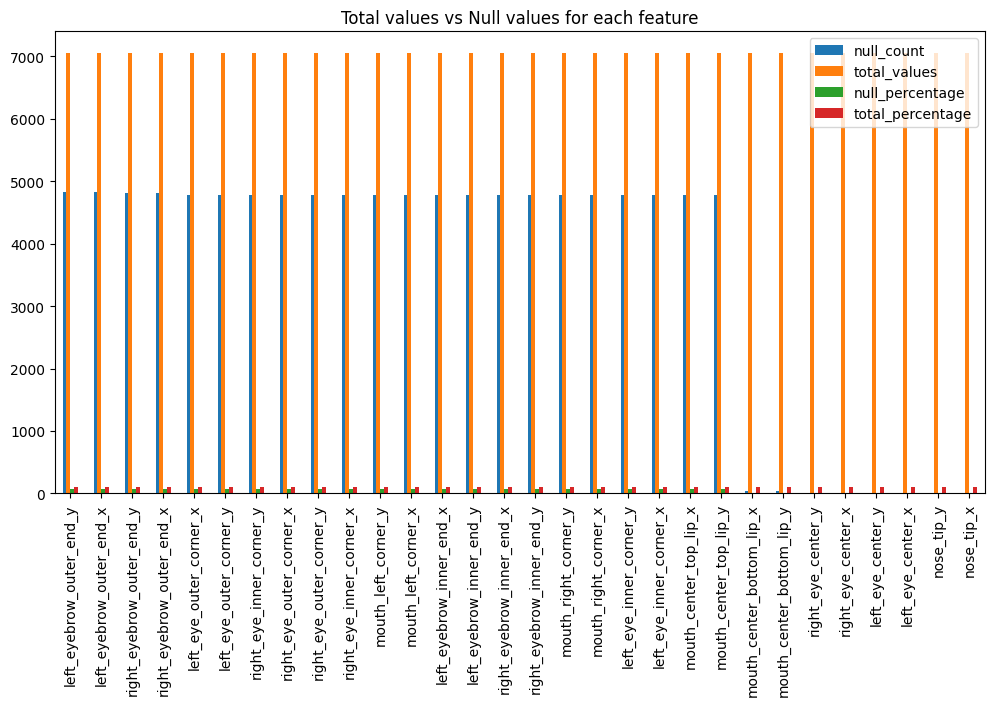

In [19]:

null_stats.plot(kind='bar',figsize=(12,6))
plt.title('Total values vs Null values for each feature')
plt.show()

### plot displaying the percentage of null values in each feature

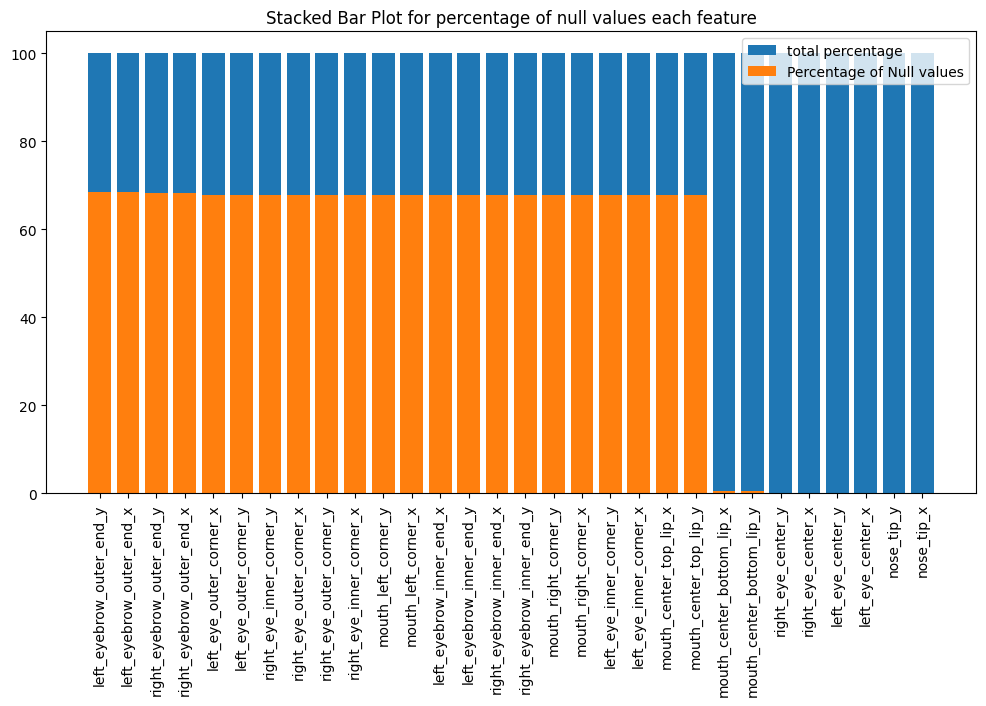

In [20]:
plt.figure(figsize=(12,6))
plt.bar(null_stats.index,null_stats['total_percentage'],label='total percentage')
plt.bar(null_stats.index,null_stats['null_percentage'],label='Percentage of Null values')
plt.xticks(rotation=90)
plt.title('Stacked Bar Plot for percentage of null values each feature')
plt.legend()
plt.show()

# Data Preprocessing

<img src="https://deepnote.com/publish/4943e322-768c-4961-b30f-c0e8f63bf0ec/file?path=data_preprocessing.png">

From the above analysis and plots, it is clear that only the features representing the `left eye, right eye, nose tip and mouth center bottom` have very minimal percentage of null values. They have less than 0.5% of null values. All the other features have atleast 67% of null values. Since, the total null values are many, we can not directly drop all the rows that have null values. If we do so, we will be left with only 35% of the current dataset. So, we need to think of different ways in which we can impute those null values.

I chose to impute the null values in each column with the mean of its respecitve column. I Know that the mean is prone to outliers but when I checked the data for many of the images, the images were laballed accurately. I did not find any outliers even after verifying many of the image extensively. This is a hyper parameter. We can even try imputing them median which is not prone to outliers.

In [21]:
# imputing all the null values in the column with mean value of respective column
for i in train_df.columns[:-1]:
    train_df[i].fillna(train_df[i].mean(),inplace=True)

In [22]:
# Displaying the null values after imputing.
train_df.isna().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

Since the null values have been imputed with the mean, we did not find any null values now.

In [23]:
def return_img_array(df):
    """
    Converts the string of pixel values into a numpy array's of size 96X96.
    """
    images=df['Image'].apply(lambda x: np.array(x.split(' '),dtype='int'))
    images=np.stack(images,axis=0).reshape(-1,96,96)/255.0
    return images

# Dividing the columns into features and targets

In [24]:
x_train=return_img_array(train_df)
y_train=train_df[features]
print(f"Shape of x_train (features): {x_train.shape}")
print(f"Shape of y_train (Images): {y_train.shape}")

Shape of x_train (features): (7049, 96, 96)
Shape of y_train (Images): (7049, 30)


# Visualizing the random image

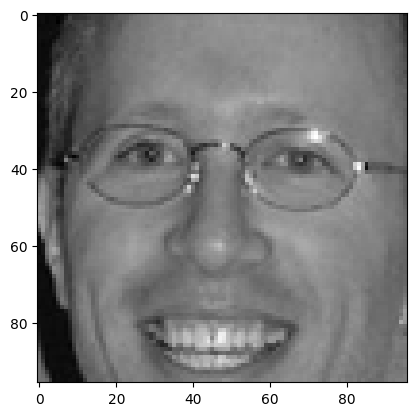

In [25]:
# getting a random index from array of train images.
random_index=np.random.choice(len(x_train))

# Displaying the image in the gray color mode
plt.imshow(x_train[random_index],cmap='gray')
plt.show()

# Displaying a grid of random images

when displaying the random image with their facial keypoints there are high chances that the keypoints might get displaced. This is so because, we have imputed the null values with the mean. The dataset contain few images of cropped faces and few images with uncropped faces. So, the imputed mean will not be representing the actual key point properly always.

In [26]:
def display_grid(rows,cols,x_train,y_train):
    """
    Function that generates the grid of random images where number of rows and
    columns needs to be supplied as arguments to the function.
    """
    plt.figure(figsize=(10,10))
    for i in range(rows*cols):
        random_index=np.random.choice(len(x_train))
        plt.subplot(rows,cols,i+1)
        plt.imshow(x_train[random_index], cmap='gray')
        plt.scatter(y_train[random_index,:,0],y_train[random_index,:,1],marker='x',color='red')
    plt.show()

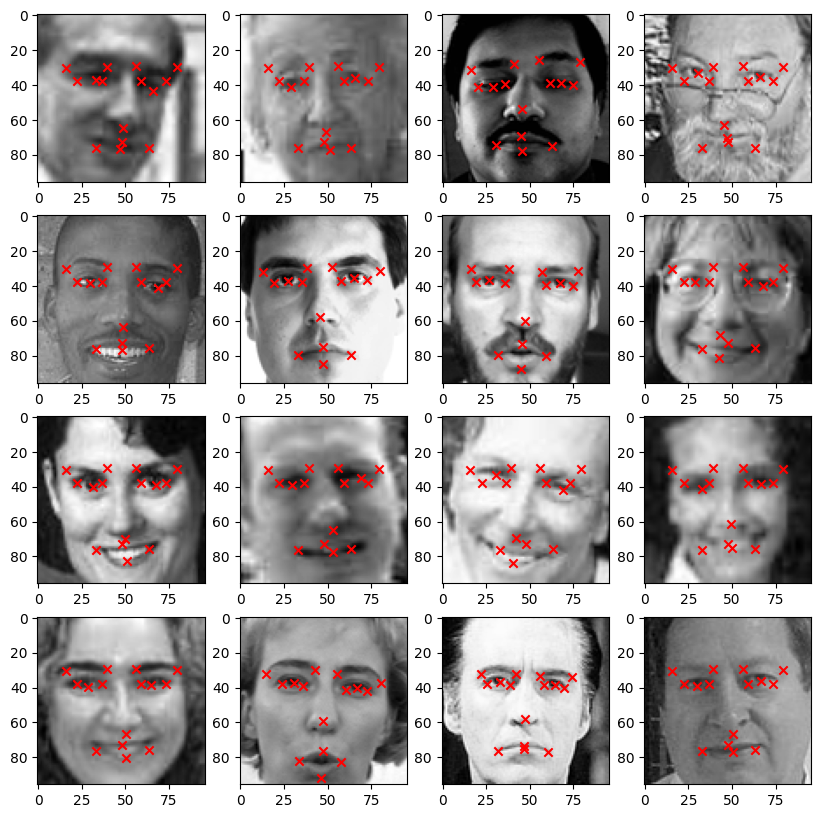

In [27]:
y_train_reshaped=y_train.values.reshape(y_train.shape[0],15,2)
display_grid(4,4,x_train,y_train_reshaped)

# Image with detailed description for marked keypoint

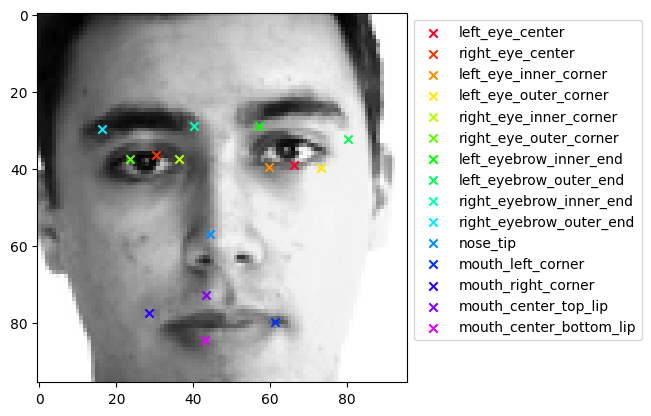

In [28]:
def plot_features(image,feature_names,features_reshaped):
    """
    Function that marks all the facial keypoints on the image with an explanatory
    legend.
    """
    #image=cv2.flip(image,1)
    NUM_COLORS = 15
    cm = plt.get_cmap('gist_rainbow')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

    ax.imshow(image, cmap='gray')
    for n, name in enumerate(feature_names):
        ax.scatter(features_reshaped[0,n,0],features_reshaped[0,n,1],marker='x',label=name)
    ax.legend(bbox_to_anchor=(1,1))
    plt.show()

plot_features(x_train[np.random.choice(len(x_train))],feature_names,y_train_reshaped)

# Data Modelling

In [29]:
# Building a CNN model using Sequential API
model = Sequential([
    Conv2D(64, (5, 5), padding='same', use_bias=False, input_shape=(96, 96, 1)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(128, (4, 4), padding='same', use_bias=False),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), padding='same', use_bias=False),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(512, (2, 2), padding='same', use_bias=False),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),

    Flatten(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(30)
])

In [30]:
# printing the summary of the model and parameters.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 64)        1600      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96, 96, 64)        0         
                                                                 
 batch_normalization (Batch  (None, 96, 96, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 128)       131072    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 48, 48, 128)       0

# Model architecture with shapes at each layer

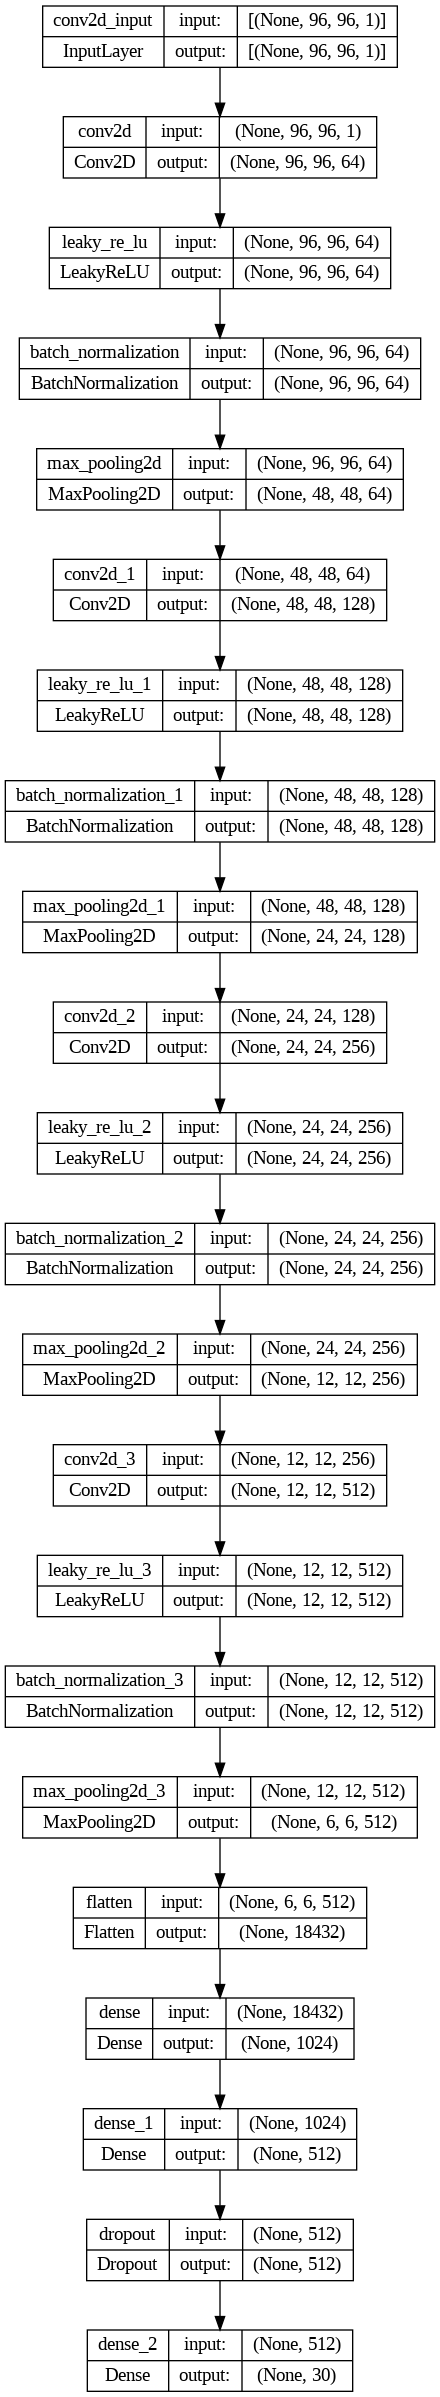

In [31]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Model Training

In [33]:
# initializing few hyper parameters
epochs = 200
batch_size = 128
validation_split = 0.2

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split = validation_split)

Epoch 1/20
45/45 [==============================] - 710s 16s/step - loss: 348.3798 - accuracy: 0.1899 - val_loss: 605.2615 - val_accuracy: 0.5780
Epoch 2/20
45/45 [==============================] - 647s 14s/step - loss: 116.9187 - accuracy: 0.2557 - val_loss: 145.1567 - val_accuracy: 0.5730
Epoch 3/20
45/45 [==============================] - 640s 14s/step - loss: 87.1167 - accuracy: 0.2926 - val_loss: 112.2241 - val_accuracy: 0.4943
Epoch 4/20
45/45 [==============================] - 637s 14s/step - loss: 73.5783 - accuracy: 0.3066 - val_loss: 77.3648 - val_accuracy: 0.4362
Epoch 5/20
45/45 [==============================] - 636s 14s/step - loss: 65.1296 - accuracy: 0.3180 - val_loss: 115.4603 - val_accuracy: 0.0340
Epoch 6/20
24/45 [===============>..............] - ETA: 4:42 - loss: 65.3211 - accuracy: 0.3135

In [ ]:
# Saving the weights of the model for re-usability
model.save_weights('weights.h5')

# Model Performance

### Displaying the loss and accuracy plot for both training and Validation

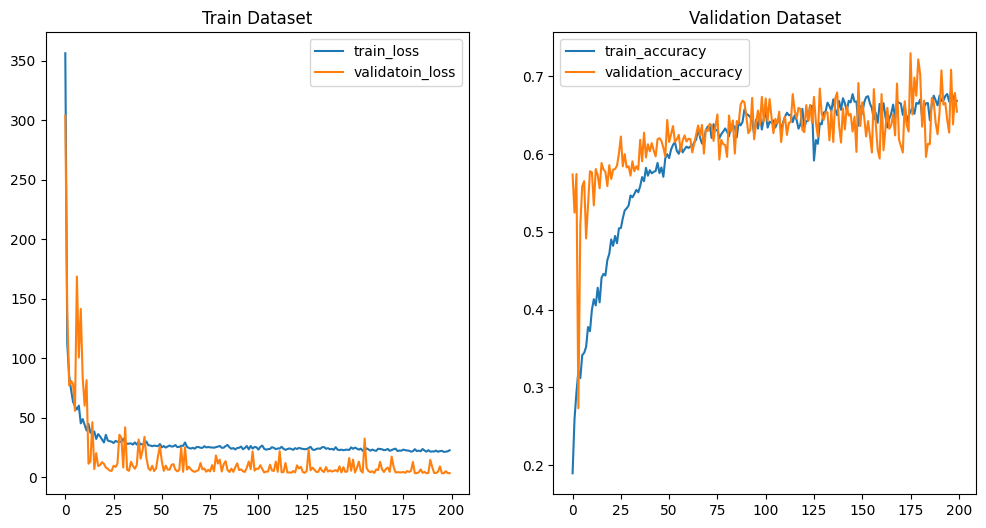

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train Dataset')
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='validatoin_loss')
plt.legend()
plt.subplot(1,2,2)
plt.title('Validation Dataset')
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.show()

# Model Validation

<center>
    <img src="https://www.decisivedge.com/uploads/shutterstock_493554238.jpg">
</center>

In [ ]:
# Getting inferences from the model on the test set.
x_test = return_img_array(test_df)
preds = model.predict(x_test)
print(preds)

56/56 [==============================] - 2s 17ms/step
[[66.66165  36.231438 29.691236 ... 69.76383  47.43096  82.239136]
 [68.2919   37.881977 30.105639 ... 74.58541  48.89135  83.233284]
 [65.831436 36.989716 30.69582  ... 72.32361  49.66576  79.060455]
 ...
 [66.74498  38.580166 31.189695 ... 73.37791  47.409958 77.87077 ]
 [62.704845 36.799694 29.141113 ... 69.641396 44.66215  75.53363 ]
 [67.00325  38.981236 30.346449 ... 74.77425  46.72922  80.12413 ]]


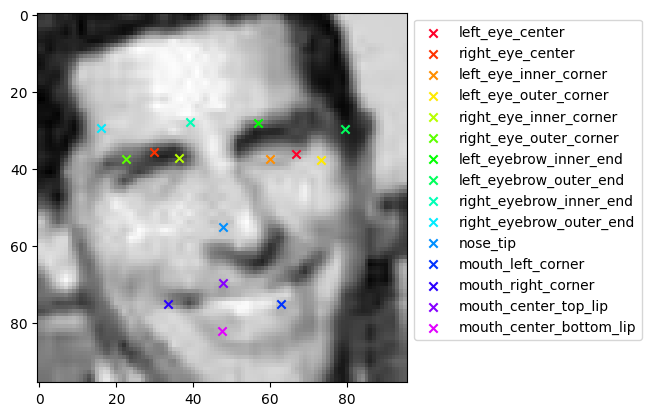

In [ ]:
# looking at the results of the model on test images.
x_test_reshaped=preds.reshape(len(preds),15,2)
plot_features(x_test[np.random.choice(len(x_test))],feature_names,x_test_reshaped)

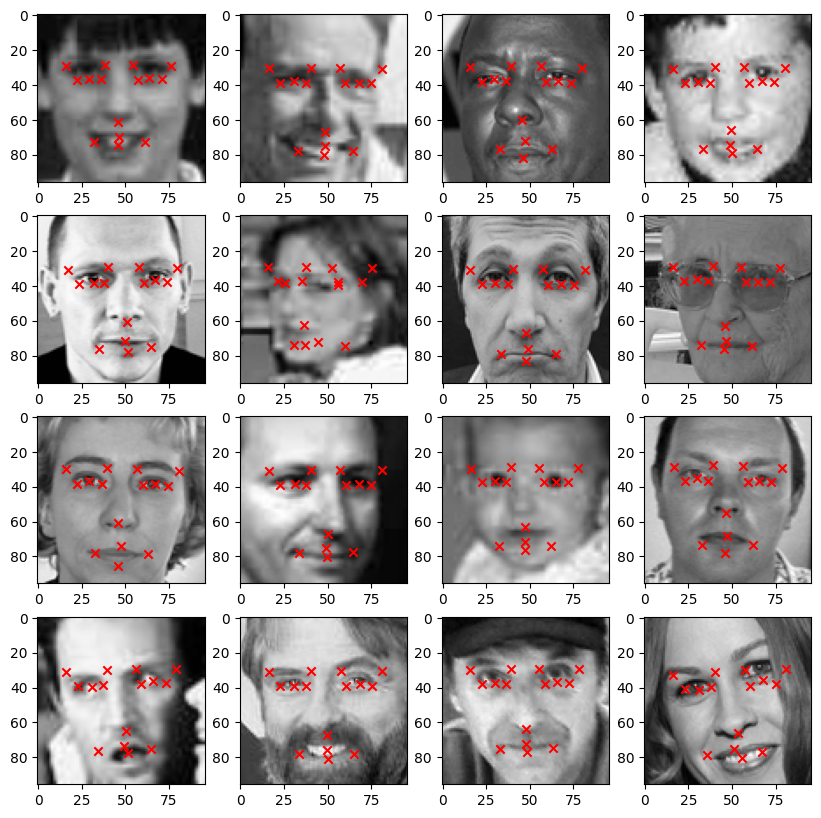

In [ ]:
display_grid(4,4,x_test,x_test_reshaped)

# Results Submission

<center> <img src="https://submit.com/wp-content/uploads/2020/07/submit-button.png"> </center>

Now, Its time for submitting your results. We need not submit the entire results that we have got from the test set. We need to submmit only the values for the features mentioned in the lookup table. More precisely speaking, we need to fill up the Loation column in the lookup table based in the RowID and ImageId columns provided.  

In [ ]:
lookup = pd.read_csv('/kaggle/input/facial-keypoints-detection/IdLookupTable.csv')

In [ ]:
lookup.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [ ]:
feature = list(lookup['FeatureName'])
image_ids = list(lookup['ImageId'] - 1)
feature_list = [feature.index(f) for f in feature]
# Filling the Location column in the lookup table.
final_preds = [preds[x][y] for x, y in zip(image_ids, feature_list)]

In [ ]:
submission_result = pd.DataFrame({'RowId': lookup['RowId'], 'Location': final_preds})
# The images in teh dataset are of the size 96X96. So, Trimming all the values below 0 to 0 and above 96 to 96.
submission_result['Location'] = submission_result['Location'].clip(0.0, 96.0)
print(submission_result.shape)

(27124, 2)


In [ ]:
submission_result.to_csv('submission.csv', index=False)

You can now download the ```submission.csv``` file from the output section and use that for making your first submission to the kaggle competition.

In [ ]:
# you can also download the submission.csv using the below link
from IPython.display import FileLink
FileLink(r'submission.csv')

/kaggle/working/submission.csv

# Future Scope

<center> <img src="https://images.shiksha.com/mediadata/images/articles/1574837436phppceLxE.jpeg">
</center>

* The approach of imputing the null values is not the good approach. Its not giving us the exact locations of the missing keypoints. Sometimes, the mean values is very far from the actual location of the keypoint. This can be observed from generating random grid of images using the above provided functions.

* To be more accurate, It is best suggested to fill the null values by looking at the images manually. Otherwise, state of the art techniques can be leverage to fill those null values.

* Model performance can be best assessed only if the data is valid. The current approach of imputing with mean has pushed to model to make inaccurate results. This should not happen. We need to make sure that the data is clean before modelling.

* We know that the 35% of the data is clean without any null values. We can even try training a model with only the 35% accurate data instead of trying to use the entire data.

* We can even reduce the total facial keypints that we want to identify to only the features that has less number of null values.